In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col='id', nrows=None)

In [3]:
df_types = train.dtypes == object
non_cont_data = train[train.columns[df_types.values]]
non_cont_data.describe()

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


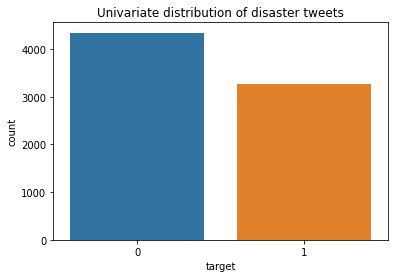

In [4]:
sns.countplot(train.target)
plt.title('Univariate distribution of disaster tweets')
plt.show()

In [5]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
grouped_train = train.groupby('target')
disasters = grouped_train.get_group(1)
disasters.select_dtypes(object).describe()

,keyword,location,text
count,3229,2196,3271
unique,220,1513,3206
top,outbreak,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,39,67,10


In [7]:
grouped_train = train.groupby('target')
non_disasters = grouped_train.get_group(0)
non_disasters.select_dtypes(object).describe()

,keyword,location,text
count,4323,2884,4342
unique,218,2142,4315
top,body%20bags,New York,He came to a land which was engulfed in tribal...
freq,40,55,4


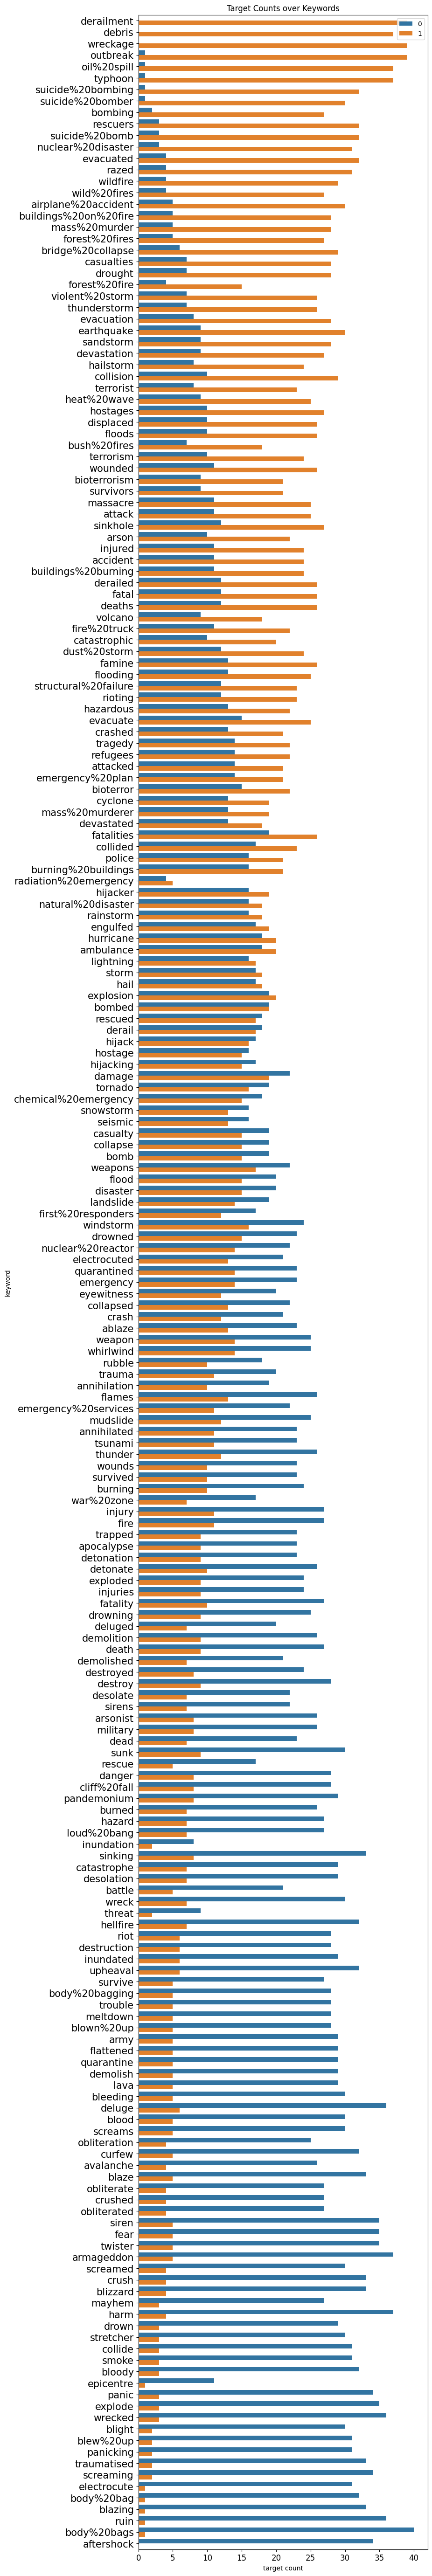

In [8]:
train['keyword_target_mean'] = train.groupby('keyword')['target'].transform('mean')
tmp_sorted_train = train.sort_values(by='keyword_target_mean', ascending=False)
fig = plt.figure(figsize=(8, 72), dpi=100)
sns.countplot(y=tmp_sorted_train['keyword'], hue=tmp_sorted_train['target'])
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('keyword')
plt.xlabel('target count')
plt.legend(loc='upper right')
plt.title('Target Counts over Keywords')
plt.show()

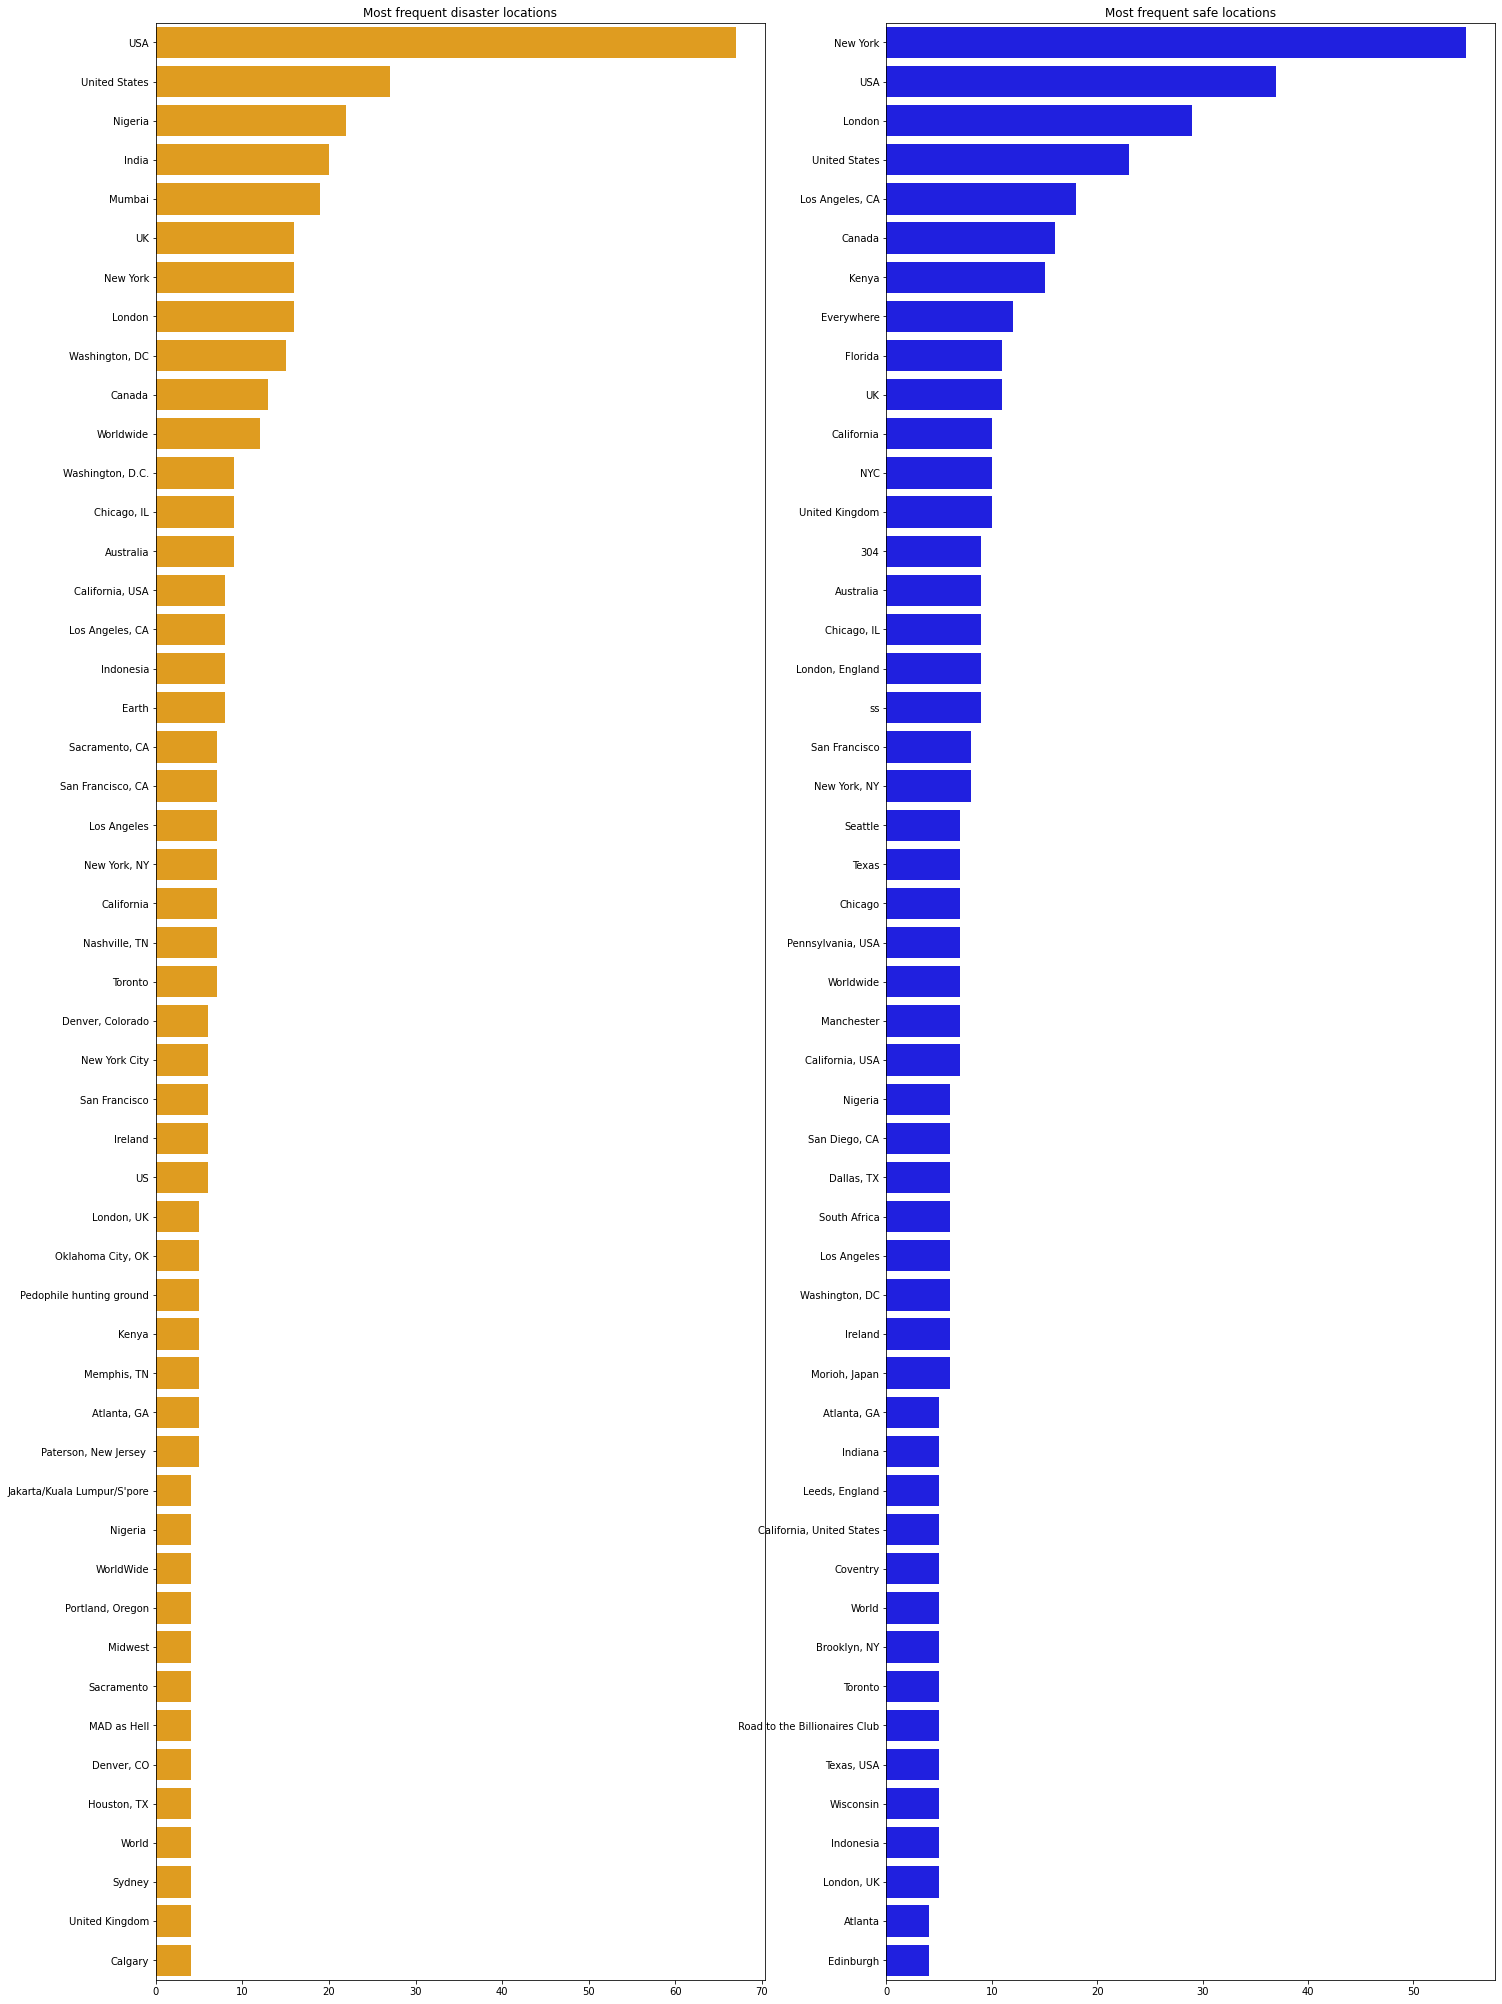

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24,36))
plt.subplot(1,2,1)
plt.title('Most frequent disaster locations')
sns.barplot(y=disasters.location.value_counts().head(50).index, x=disasters.location.value_counts().head(50).values, color='orange')
plt.title('Most frequent disaster locations')
plt.subplot(1,2,2)
plt.title('Most frequent safe locations')
sns.barplot(y=non_disasters.location.value_counts().head(50).index, x=non_disasters.location.value_counts().head(50).values, color='blue')
plt.show()

In [11]:
for value in non_disasters['text'].values:
    print(value)

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!
this is ridiculous....
London is cool ;)
Love skiing
What a wonderful day!
LOOOOOOL
No way...I can't eat that shit
Was in NYC last week!
Love my girlfriend
Cooool :)
Do you like pasta?
The end!
We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
Crying out for more! Set me ablaze
On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.
Ablaze for you Lord :D
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw
on the outside you're ablaze and alive
but you're dead inside
Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??
SOOOO PUMPED FOR ABLAZE ???? @southridgelife
I wanted to set Chicago ablaze with my preac

Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube
Which is true to an extent. The obliteration of white privilege would reduce unfair favoritism.
Does Renovation Mean Obliteration? http://t.co/pQ3ipUgkuY #entrepreneur #management #leadership #smallbiz #startup #business
For maximum damage! Activate [BIG BAND MODE] for old-timey obliteration!
Why did God order obliteration of ancient Canaanites? http://t.co/pKKcdWjyg0 via @worldnetdaily
He is justifying why this quarrel would one day end in d obliteration of what remains as the state of Pakistan. https://t.co/z8Ij8KTkyk
Fear is the mind killer. Fear is the little-death that brings total obliteration.  Bene Gesserit Litany Against Fear Dune   @atgrannyshouse
@TroySlaby22 slicker than an oil spill
@DrAtomic420 where did you get that pic from where it shows that there is 2 trophies for Outbreak? Or did they photoshop it?
Tube strike = absolute pandemonium
Element of Freedom: The Biggest Party of the Summer @ Mir

In [12]:
for value in disasters['text'].values:
    print(value)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...
Three people died from the heat wave so far
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
#raining #flooding #Florida 

Typhoon Soudelor taking dead aim at Taiwan http://t.co/sA5CDWVDXt
How long O Lord (Study 3)
 The sixth seal opens the events of Revelation 12. The political upheaval in the Roman... http://t.co/GW0CXoOJyV
Ancient Mayan Tablet Found in Jungle Temple http://t.co/qp6q8RS8ON
A Look at State Actions a Year after FergusonÛªs Upheaval https://t.co/M4tuI0P9nT MD is mentioned in the last group for a 'reporting' bill
A Look at State Actions a Year After #Ferguson's Upheaval http://t.co/qwSbVfLPE1
@nytimes 
Due to upheaval created by the west in Iraq Syria Libya etc.
A look at state actions a year after Ferguson's upheaval http://t.co/vXUFtVT9AU
Terrifying POV footage captures violent landing from inside a passenger jet during a storm in Amsterdam http://t.co/NqXQYI70W4 #travel
Rather violent storm. Possibility of no stream tonight.
Violent Storm Causes Damage Flooding in Watertown - http://t.co/3ZASZ6wxjJ
Thunder pounds north goes black
a deep bruise on the sky's chest
wind cries its pain.  
A 